Poniżej znajduje się przykładowe razwiąznie zagadnienia:

$$ \nabla \cdot v = 0 $$

$$ v_t +  v \nabla v - \nu \nabla \cdot  \left( \frac{b}{\omega} \nabla v  \right) = - \nabla p $$

$$ \omega_t + \alpha_1 \nabla \cdot  ( \omega v ) - \kappa_1 \nabla \cdot  \left( \frac{b}{\omega} \nabla \omega  \right) = - \kappa_2 \omega^2 $$

$$ b_t + \alpha_2 \nabla \cdot  ( bv ) - \kappa_3 \nabla \cdot  \left( \frac{b}{\omega} \nabla b  \right) = - \alpha_3 b \omega + \kappa_4 \frac{b}{\omega} \left| D(v) \right|^2 $$

$$ v = 0~~~~\text{na } \partial \Omega $$

$$ \nabla \omega \cdot n = 0~~~~\text{na } \partial \Omega $$

$$ \nabla b \cdot n = 0~~~~\text{na } \partial \Omega $$

In [1]:
from siatka import Siatka
from brzeg import Brzeg_protokat, Brzeg_1D
from boundary_point import Boundary_point
from solver import Solver

In [2]:
import numpy as np

# elementy wewnatrz 

funk_v= [
        lambda x,y,t: 0,  # brzeg 1 - prawy
        lambda x,y,t: 0,  # brzeg 2 - gora
        lambda x,y,t: 0,  # brzeg 3 - lewy
        lambda x,y,t: 0,  # brzeg 4 - dol
]

funk_u= [
        lambda x,y,t: 0,  # brzeg 1 - prawy
        lambda x,y,t: 0,  # brzeg 2 - gora
        lambda x,y,t: 0,  # brzeg 3 - lewy
        lambda x,y,t: 0,  # brzeg 4 - dol
]

b1 = Brzeg_protokat(0.4,0.6,0.4,0.6,funk_v,funk_u)

b2 = Brzeg_protokat(0.4,0.6,0.8,1.0,funk_v,funk_u)

b3 = Brzeg_protokat(0.0,0.2,0.4,0.6,funk_v,funk_u)

b4 = Brzeg_protokat(0.8,1.0,0.4,0.6,funk_v,funk_u)

b5 = Brzeg_protokat(0.4,0.6,0.0,0.2,funk_v,funk_u)

brzeg = [b1,b2,b3,b4,b5]
#brzeg = []

# brzeg zewnetrzny 1 obszaru - prawy
funk_v0 = lambda x,y,t: 0 #1 - np.exp(-t)
funk_u0 = lambda x,y,t: 0

b1 = Brzeg_1D(1,1,0,1,funk_v0,funk_u0)

# brzeg zewnetrzny 2 obszaru - gora
funk_v0 = lambda x,y,t: 0
funk_u0 = lambda x,y,t: 0

b2 = Brzeg_1D(0,1,1,1,funk_v0,funk_u0)

# brzeg zewnetrzny 3 obszaru - lewy
funk_v0 = lambda x,y,t: 0 #1 - np.exp(-t)
funk_u0 = lambda x,y,t: 0

b3 = Brzeg_1D(0,0,0,1,funk_v0,funk_u0)

# brzeg zewnetrzny 4 obszaru - dol
funk_v0 = lambda x,y,t: 0
funk_u0 = lambda x,y,t: 0

b4 = Brzeg_1D(0,1,0,0,funk_v0,funk_u0)

bounds = [b1,b2,b3,b4]

# warunki poczatkowe - v,u

v_0 = lambda x,y: 0
u_0 = lambda x,y: 0

# sila zewnetrzna f

#fx = lambda x,y,t: -np.sin(np.arctan2(y-0.5,x-0.5))*10
#fy = lambda x,y,t:  np.cos(np.arctan2(y-0.5,x-0.5))*10

r = 0.3
fx = lambda x,y,t: -np.sin(np.arctan2(y-0.5,x-0.5)) * ( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) <= r*r ) * 15
fy = lambda x,y,t:  np.cos(np.arctan2(y-0.5,x-0.5)) * ( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) <= r*r ) * 15


# warunek pocztkowy

wsp = 40
omega0 = lambda x,y: 0.01*(np.sin(
    (wsp*(x-0.5)*(x-0.5)+wsp*(y-0.5)*(y-0.5))
    )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) >= 25 * np.pi * np.pi / wsp / wsp )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) <= 36 * np.pi * np.pi / wsp / wsp )
                           + 2.1)
b0 = lambda x,y: 0.01*(np.sin(
    (wsp*(x-0.5)*(x-0.5)+wsp*(y-0.5)*(y-0.5))
    )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) >= 25 * np.pi * np.pi / wsp / wsp )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) <= 36 * np.pi * np.pi / wsp / wsp )
                           + 2.1)
#omega0 = lambda x,y: 0.1
#b0     = lambda x,y: 0.1

options = {'kappa1': 1.0, 'kappa2': 0.001, 'kappa3': 1,   'kappa4': 1,
           'alpha1': 3.0, 'alpha2': 1,     'alpha3': 1,
           'nu'    : 0.6, 'beta'  : 0.0,   'delta' : 0.007}

siatka = Siatka(1, 1, 1/100, brzeg,bounds)
#          dt,      siatka, v_0, u_0, omega0, b0, fx, fy, options
s = Solver(0.00001, siatka, v_0, u_0, omega0, b0, fx, fy, options)

Rozpoczynam zapis siatki...
Wykonane
Rozpoczynam inicjalizacje predkosci...
Wykonane
Rozpoczynam inicjalizacje cisnienia...
Wykonane
Rozpoczynam inicjalizacje omega...
Wykonane
Rozpoczynam inicjalizacje b...
Wykonane
Rozpoczynam inicjalizacje sily zewnetrzej...
Wykonane


In [3]:
d = dict(INNER=s.siatka.inner_points, X=s.siatka.X, Y=s.siatka.Y )
np.savez("siatka", **d )

In [8]:
s.solve(0.0501, 0.0001, 0.001, "solK2Legit3")

Czas 0.0001.....Dodano
Czas 0.0002.....Dodano
Czas 0.0003.....Dodano
Czas 0.0004.....Dodano
Czas 0.0005.....Dodano
Czas 0.0006.....Dodano
Czas 0.0007.....Dodano
Czas 0.0008.....Dodano
Czas 0.0009.....Dodano
Czas 0.001.....Dodano
Czas:0.001 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0011.....Dodano
Czas 0.0012.....Dodano
Czas 0.0013.....Dodano
Czas 0.0014.....Dodano
Czas 0.0015.....Dodano
Czas 0.0016.....Dodano
Czas 0.0017.....Dodano
Czas 0.0018.....Dodano
Czas 0.0019.....Dodano
Czas 0.002.....Dodano
Czas:0.002 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0021.....Dodano
Czas 0.0022.....Dodano
Czas 0.0023.....Dodano
Czas 0.0024.....Dodano
Czas 0.0025.....Dodano
Czas 0.0026.....Dodano
Czas 0.0027.....Dodano
Czas 0.0028.....Dodano
Czas 0.0029.....Dodano
Czas 0.003.....Dodano
Czas:0.003 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0031.....Dodano
Czas 0.0032.....Dodano
Czas 0.0033.....Dodano
Czas 0.0034.....Dodano
Czas 0.0035.....Dodano
Czas 0.0036.....Do

Czas 0.0286.....Dodano
Czas 0.0287.....Dodano
Czas 0.0288.....Dodano
Czas 0.0289.....Dodano
Czas 0.029.....Dodano
Czas:0.029 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0291.....Dodano
Czas 0.0292.....Dodano
Czas 0.0293.....Dodano
Czas 0.0294.....Dodano
Czas 0.0295.....Dodano
Czas 0.0296.....Dodano
Czas 0.0297.....Dodano
Czas 0.0298.....Dodano
Czas 0.0299.....Dodano
Czas 0.03.....Dodano
Czas:0.03 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0301.....Dodano
Czas 0.0302.....Dodano
Czas 0.0303.....Dodano
Czas 0.0304.....Dodano
Czas 0.0305.....Dodano
Czas 0.0306.....Dodano
Czas 0.0307.....Dodano
Czas 0.0308.....Dodano
Czas 0.0309.....Dodano
Czas 0.031.....Dodano
Czas:0.031 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0311.....Dodano
Czas 0.0312.....Dodano
Czas 0.0313.....Dodano
Czas 0.0314.....Dodano
Czas 0.0315.....Dodano
Czas 0.0316.....Dodano
Czas 0.0317.....Dodano
Czas 0.0318.....Dodano
Czas 0.0319.....Dodano
Czas 0.032.....Dodano
Czas:0.032 - zapisano

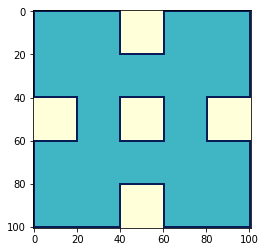

In [9]:
import matplotlib.pyplot as plt
fig = plt.imshow(s.siatka.inner_points, cmap='YlGnBu', interpolation='nearest')
plt.show()
fig.figure.savefig("geometryK2D.png")

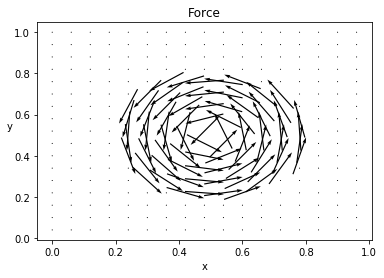

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

np.seterr(divide='ignore', invalid='ignore')

# quiver
XX = s.siatka.X
YY = s.siatka.Y
X, Y = np.meshgrid(XX, YY)
V = fx(X,Y,0)
U = fy(X,Y,0)

k = 6

plt.figure()
plt.title('Force')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.quiver(X[::k, ::k], Y[::k, ::k], V[::k, ::k], U[::k, ::k],pivot='mid', units='inches')

plt.subplots_adjust(hspace = 0.5,wspace = 0.05)

plt.savefig('f1.pdf')
plt.show()

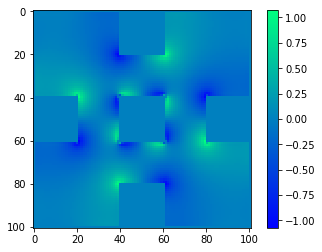

In [11]:
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 0 or s.siatka.inner_points[iy,ix] == 2:
            s.p[iy,ix] = 0

import matplotlib.pyplot as plt
import numpy as np


fig = plt.imshow(s.p, cmap='winter', interpolation='nearest')
plt.colorbar(fig)
plt.show()
fig.figure.savefig("pressureK2D.png")


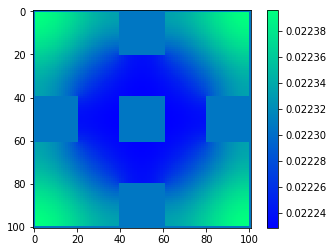

In [12]:
# normalizacja pod wykres
ile = 0 
suma = 0
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 1:
            suma += s.omega[iy,ix]
            ile  += 1
srednia = suma/ile
            
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 0 or s.siatka.inner_points[iy,ix] == 2:
            s.omega[iy,ix] = srednia


import matplotlib.pyplot as plt

fig = plt.imshow(s.omega, cmap='winter', interpolation='nearest')
plt.colorbar(fig)
plt.show()
fig.figure.savefig("omegaK2D.png")

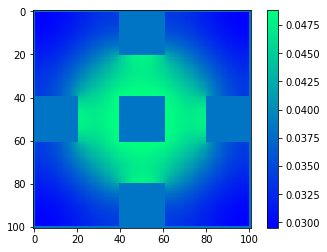

In [13]:
# normalizacja pod wykres
ile = 0 
suma = 0
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 1:
            suma += s.b[iy,ix]
            ile  += 1
srednia = suma/ile
            
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 0 or s.siatka.inner_points[iy,ix] == 2:
            s.b[iy,ix] = srednia
            

fig = plt.imshow(s.b, cmap='winter', interpolation='nearest')
plt.colorbar(fig)
plt.show()
fig.figure.savefig("bK2D.png")

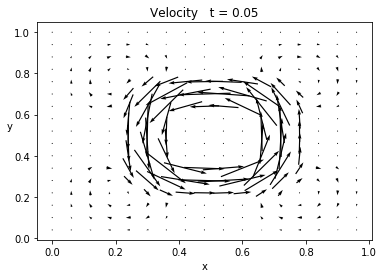

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

np.seterr(divide='ignore', invalid='ignore')

# quiver
XX = s.siatka.X
YY = s.siatka.Y
X, Y = np.meshgrid(XX, YY)
V = s.v 
U = s.u

k = 6

plt.figure()
plt.title('Velocity   t = ' + str(round(s.t,3)))
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.quiver(X[::k, ::k], Y[::k, ::k], V[::k, ::k], U[::k, ::k],pivot='mid', units='inches')

plt.subplots_adjust(hspace = 0.5,wspace = 0.05)

plt.savefig('velocityK2D.pdf')
plt.show()